In [4]:
# Load necessary libraries
library(tidyverse)
library(h2o)

# Load the data
data <- read.csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Quick overview of the dataset
str(data)
summary(data)

# Check for missing values
colSums(is.na(data))



----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: ‘h2o’


The following objects are masked from ‘package:lubridate’:

    day, hour, month, week, year


The following objects are masked from ‘package:stats’:

    cor, sd, var


The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : chr  "Yes" "No" "Yes" "No" ...
 $ BusinessTravel          : chr  "Travel_Rarely" "Travel_Frequently" "Travel_Rarely" "Travel_Frequently" ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : chr  "Sales" "Research & Development" "Research & Development" "Research & Development" ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : chr  "Female" "Male" "Male" "Female" ...
 $ HourlyRate              : int  94 61 92 56 40 79 8

      Age         Attrition         BusinessTravel       DailyRate     
 Min.   :18.00   Length:1470        Length:1470        Min.   : 102.0  
 1st Qu.:30.00   Class :character   Class :character   1st Qu.: 465.0  
 Median :36.00   Mode  :character   Mode  :character   Median : 802.0  
 Mean   :36.92                                         Mean   : 802.5  
 3rd Qu.:43.00                                         3rd Qu.:1157.0  
 Max.   :60.00                                         Max.   :1499.0  
  Department        DistanceFromHome   Education     EducationField    
 Length:1470        Min.   : 1.000   Min.   :1.000   Length:1470       
 Class :character   1st Qu.: 2.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median : 7.000   Median :3.000   Mode  :character  
                    Mean   : 9.193   Mean   :2.913                     
                    3rd Qu.:14.000   3rd Qu.:4.000                     
                    Max.   :29.000   Max.   :5.000              

Age                Attrition           BusinessTravel 
                       0                        0                        0 
               DailyRate               Department         DistanceFromHome 
                       0                        0                        0 
               Education           EducationField            EmployeeCount 
                       0                        0                        0 
          EmployeeNumber  EnvironmentSatisfaction                   Gender 
                       0                        0                        0 
              HourlyRate           JobInvolvement                 JobLevel 
                       0                        0                        0 
                 JobRole          JobSatisfaction            MaritalStatus 
                       0                        0                        0 
           MonthlyIncome              MonthlyRate       NumCompaniesWorked 
                       0                        0                        0 
                  Over18                 OverTime        PercentSalaryHike 
                       0                        0                        0 
       PerformanceRating RelationshipSatisfaction            StandardHours 
                       0                        0                        0 
        StockOptionLevel        TotalWorkingYears    TrainingTimesLastYear 
                       0                        0                        0 
         WorkLifeBalance           YearsAtCompany       YearsInCurrentRole 
                       0                        0                        0 
 YearsSinceLastPromotion     YearsWithCurrManager 
                       0                        0

In [5]:
install.packages("corrplot")
# Load required libraries
library(tidyverse)
library(corrplot)
library(h2o)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



In [3]:
install.packages("h2o")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘RCurl’




In [6]:
# Initialize H2O
h2o.init()


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpTUeuzs/file17472a1e8e7/h2o_UnknownUser_started_from_r.out
    /tmp/RtmpTUeuzs/file1742360ca7a/h2o_UnknownUser_started_from_r.err


Starting H2O JVM and connecting: ..... Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         4 seconds 153 milliseconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.44.0.3 
    H2O cluster version age:    10 months and 29 days 
    H2O cluster name:           H2O_started_from_R_root_hxw008 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.17 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:

Warning message in h2o.clusterInfo():
“
Your H2O cluster version is (10 months and 29 days) old. There may be a newer version available.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html”


In [7]:
# Convert Attrition to a factor
data$Attrition <- as.factor(data$Attrition)

# Summary statistics
summary(data)

      Age        Attrition  BusinessTravel       DailyRate     
 Min.   :18.00   No :1233   Length:1470        Min.   : 102.0  
 1st Qu.:30.00   Yes: 237   Class :character   1st Qu.: 465.0  
 Median :36.00              Mode  :character   Median : 802.0  
 Mean   :36.92                                 Mean   : 802.5  
 3rd Qu.:43.00                                 3rd Qu.:1157.0  
 Max.   :60.00                                 Max.   :1499.0  
  Department        DistanceFromHome   Education     EducationField    
 Length:1470        Min.   : 1.000   Min.   :1.000   Length:1470       
 Class :character   1st Qu.: 2.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median : 7.000   Median :3.000   Mode  :character  
                    Mean   : 9.193   Mean   :2.913                     
                    3rd Qu.:14.000   3rd Qu.:4.000                     
                    Max.   :29.000   Max.   :5.000                     
 EmployeeCount EmployeeNumber   EnvironmentSatis

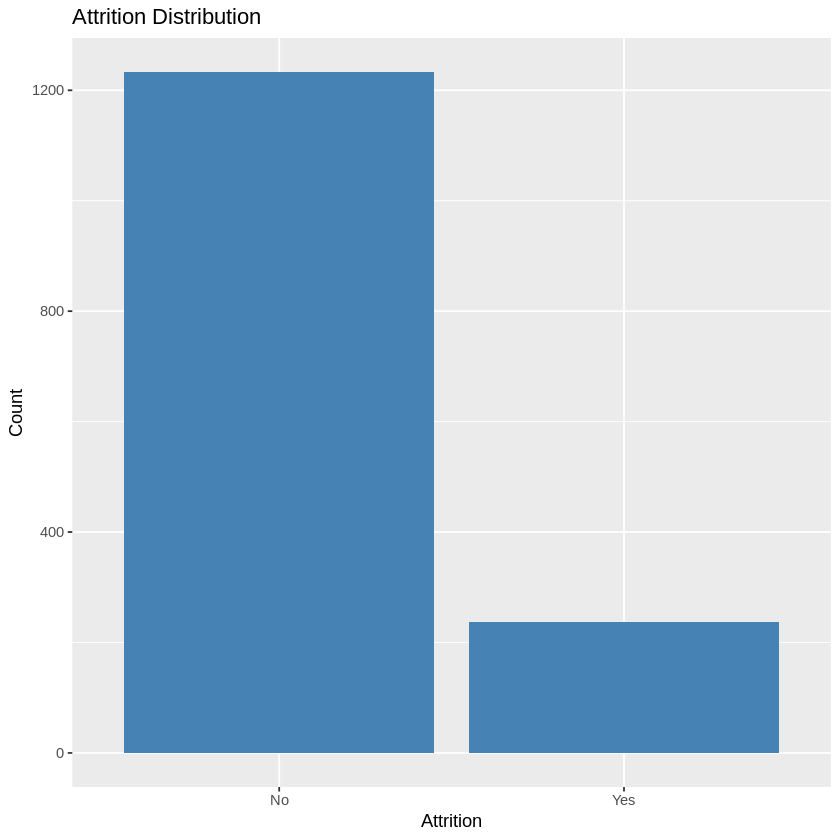

In [8]:
# Distribution of Attrition
ggplot(data, aes(x = Attrition)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Attrition Distribution", x = "Attrition", y = "Count")

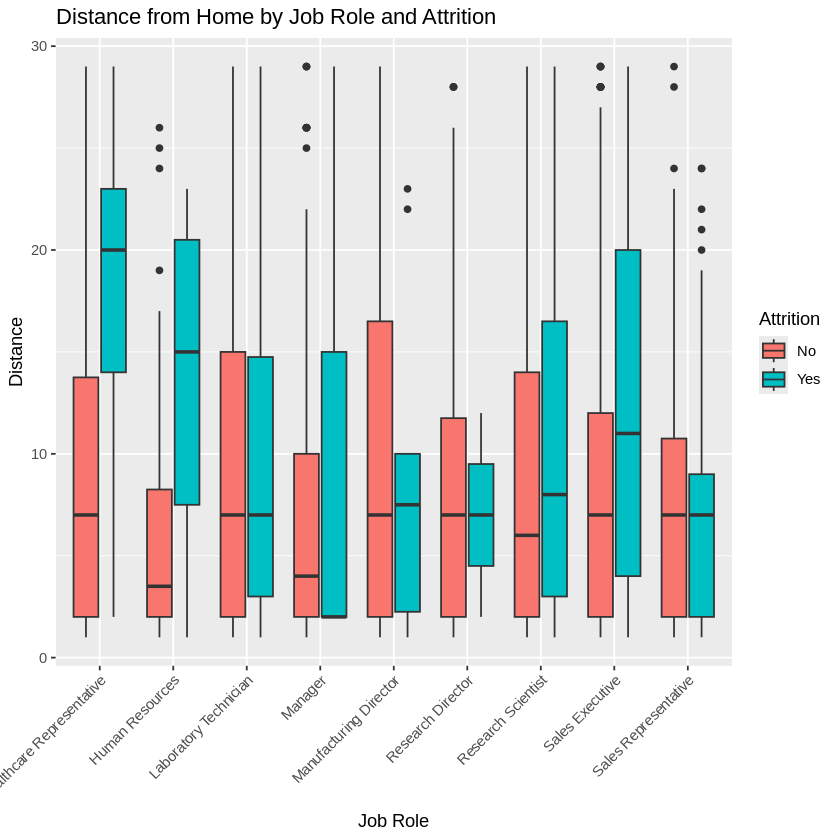

In [13]:
# Distance from Home by Job Role and Attrition
ggplot(data, aes(x = JobRole, y = DistanceFromHome, fill = Attrition)) +
  geom_boxplot() +
  labs(title = "Distance from Home by Job Role and Attrition", x = "Job Role", y = "Distance") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

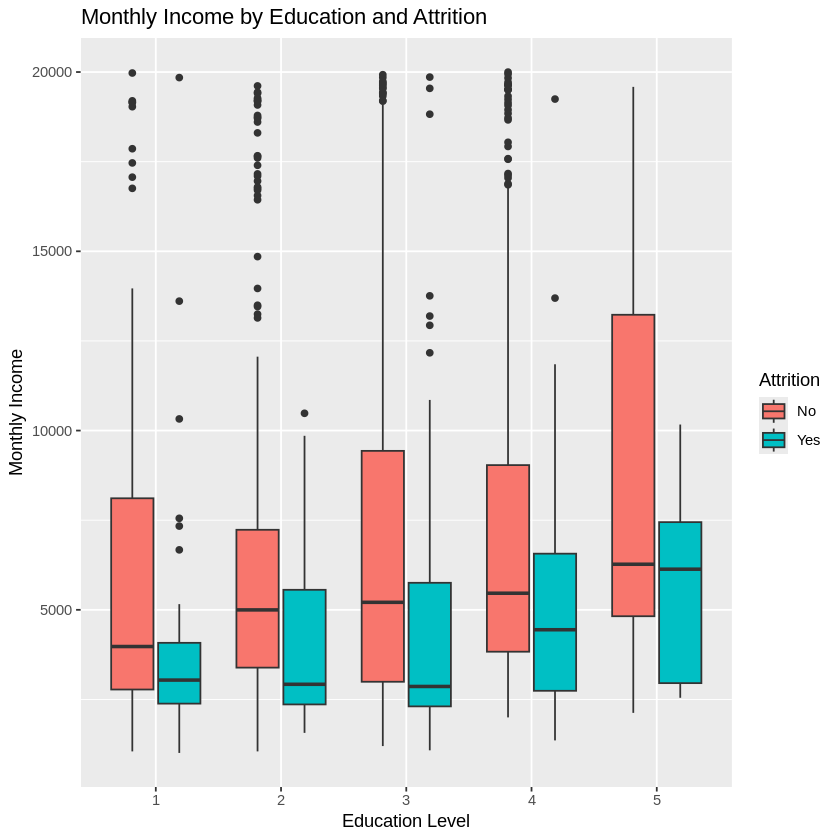

In [19]:
# Monthly Income by Education and Attrition
ggplot(data, aes(x = factor(Education), y = MonthlyIncome, fill = Attrition)) +
  geom_boxplot() +
  labs(title = "Monthly Income by Education and Attrition", x = "Education Level", y = "Monthly Income")

In [16]:
# Select numeric features
numeric_features <- data %>%
  select_if(is.numeric)

Warning message in stats::cor(x, ...):
“the standard deviation is zero”


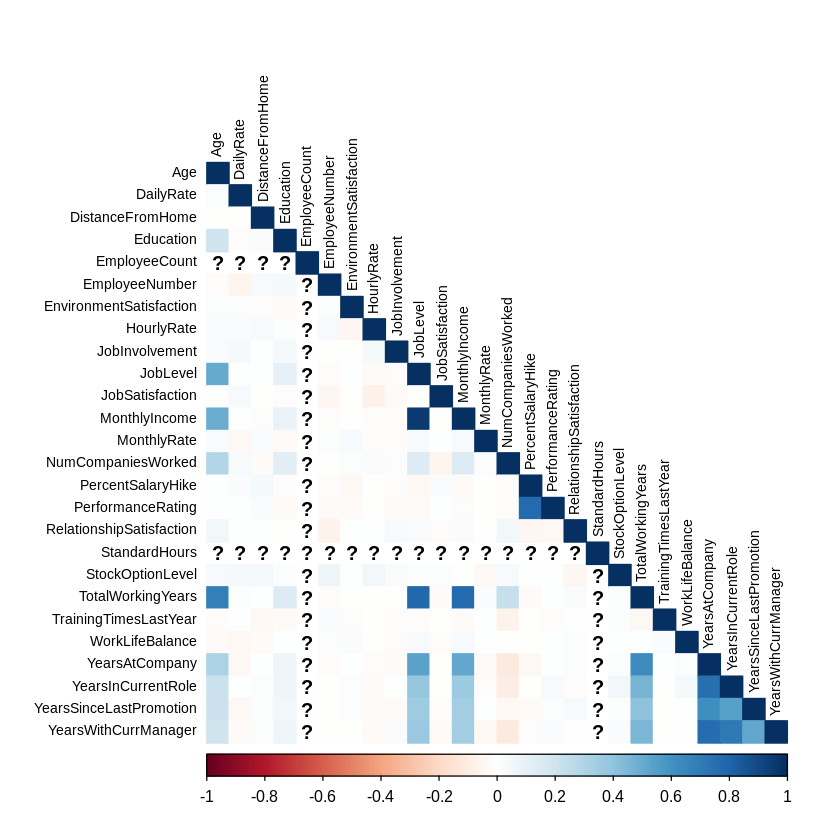

In [17]:
# Correlation matrix
cor_matrix <- cor(numeric_features)

# Plot correlation heatmap
corrplot(cor_matrix, method = "color", type = "lower", tl.cex = 0.7, tl.col = "black")

In [18]:
# Convert data to H2O frame
data_h2o <- as.h2o(data)

# Split the data
splits <- h2o.splitFrame(data_h2o, ratios = 0.8, seed = 1234)
train <- splits[[1]]
test <- splits[[2]]

# Run AutoML
aml <- h2o.automl(
  y = "Attrition",
  x = setdiff(names(data_h2o), "Attrition"),
  training_frame = train,
  leaderboard_frame = test,
  max_models = 10,
  seed = 1234
)

# View leaderboard
lb <- aml@leaderboard
print(lb)

# Predict on test data
pred <- h2o.predict(aml@leader, test)
print(pred)


  |======================================================================| 100%
  |                                                                      |   0%
  |=                                                                     |   2%
  |===                                                                   |   4%
  |====                                                                  |   6%
  |======                                                                |   8%
  |=======                                                               |  10%
  |========                                                              |  12%
  |==========                                                            |  14%
  |===========                                                           |  16%
  |=============                                                         |  19%
  |==============                                                        |  20%
  |===================                  